In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [123]:
weather  = pd.read_csv('seattle-weather.csv')

In [124]:
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


# Ask Six Questions

In [125]:
weather.shape

(1461, 6)

In [126]:
weather.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [127]:
weather.duplicated().sum()

0

In [128]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [129]:
weather.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [130]:
corr = weather.corr()

In [131]:
corr

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


<AxesSubplot:>

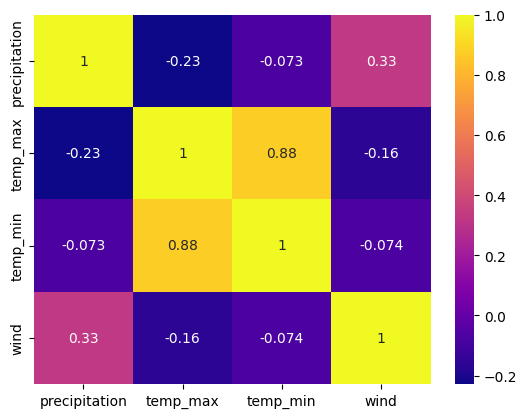

In [132]:
sns.heatmap(corr, annot=True,cbar=True,  cmap='plasma')

# Label Encoding

In [133]:
weather['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [134]:
weather['weather'] = weather['weather'].map({"rain":0,'sun':1,'fog':2,'drizzle':3,'snow':4})

In [135]:
weather['weather'].value_counts()

0    641
1    640
2    101
3     53
4     26
Name: weather, dtype: int64

# Working on date colunm

In [136]:
weather['date'].value_counts()

2012-01-01    1
2014-09-09    1
2014-09-07    1
2014-09-06    1
2014-09-05    1
             ..
2013-04-30    1
2013-04-29    1
2013-04-28    1
2013-04-27    1
2015-12-31    1
Name: date, Length: 1461, dtype: int64

In [150]:
weather['date'] = pd.to_datetime(weather['date'])
weather['year'] = weather['date'].dt.year
weather['month'] = weather['date'].dt.month
weather['day'] = weather['date'].dt.day
weather

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,2012-01-01,0.0,12.8,5.0,4.7,3,2012,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,0,2012,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,0,2012,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,0,2012,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,0,2012,1,5
...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,0,2015,12,27
1457,2015-12-28,1.5,5.0,1.7,1.3,0,2015,12,28
1458,2015-12-29,0.0,7.2,0.6,2.6,2,2015,12,29
1459,2015-12-30,0.0,5.6,-1.0,3.4,1,2015,12,30


# train test split

In [151]:
X = weather.drop(['date','weather'],axis=1)
y = weather['weather']

In [152]:
X.shape

(1461, 7)

In [153]:
y.shape

(1461,)

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
X_train.shape

(1168, 7)

In [158]:
X_test.shape

(293, 7)

In [157]:
weather.shape

(1461, 9)

C:\Users\Noor Saeed\AppData\Local\Temp\ipykernel_12028\1271118368.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


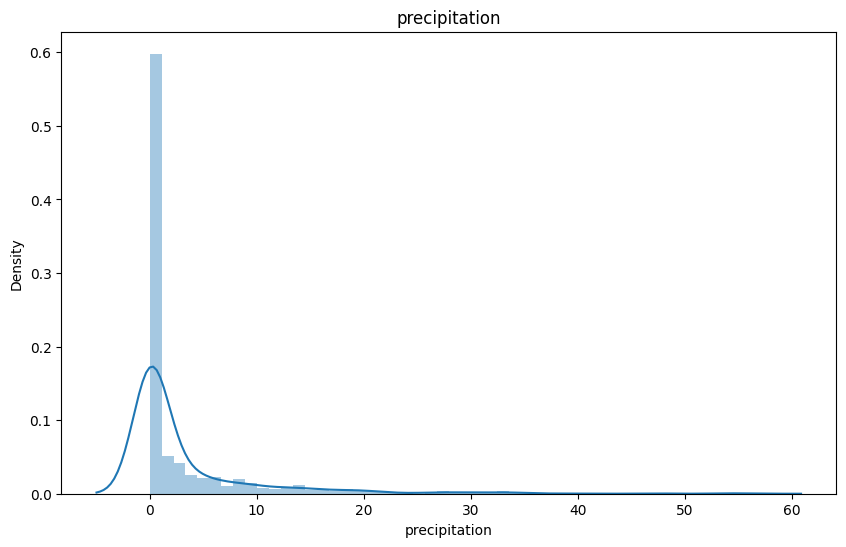

C:\Users\Noor Saeed\AppData\Local\Temp\ipykernel_12028\1271118368.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


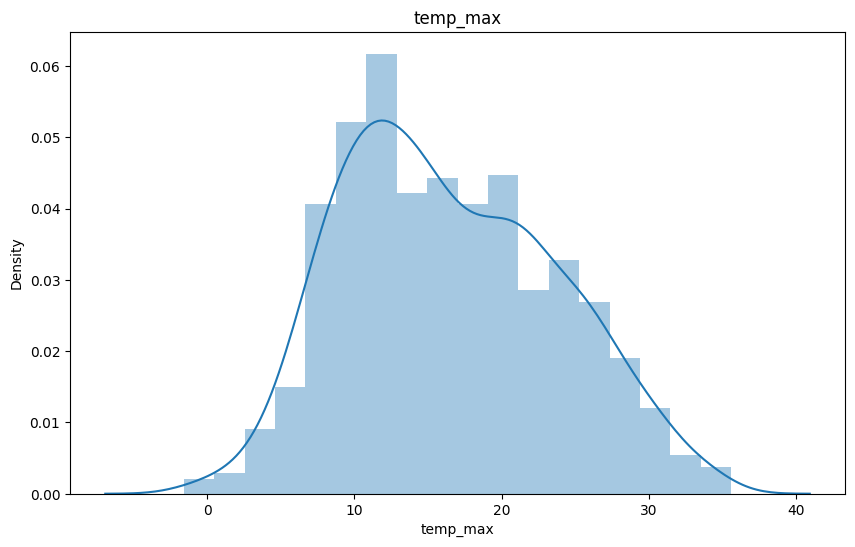

C:\Users\Noor Saeed\AppData\Local\Temp\ipykernel_12028\1271118368.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


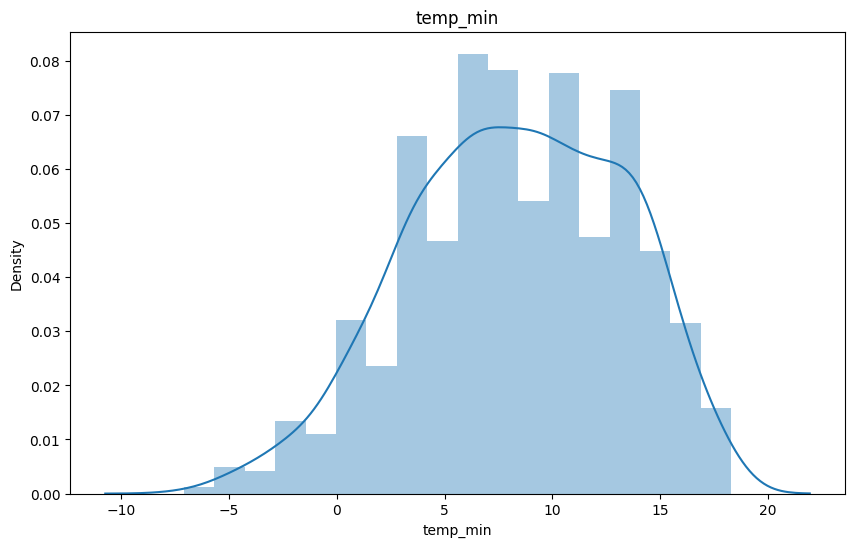

C:\Users\Noor Saeed\AppData\Local\Temp\ipykernel_12028\1271118368.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


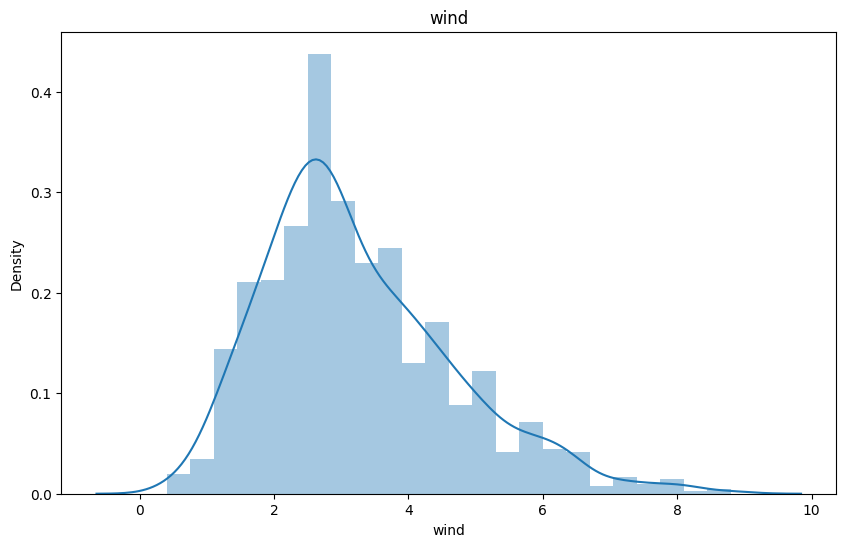

C:\Users\Noor Saeed\AppData\Local\Temp\ipykernel_12028\1271118368.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


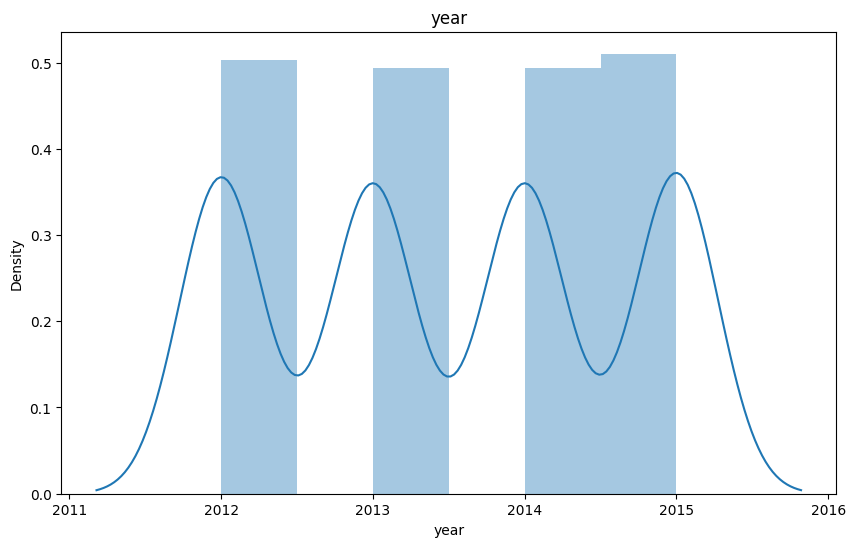

C:\Users\Noor Saeed\AppData\Local\Temp\ipykernel_12028\1271118368.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


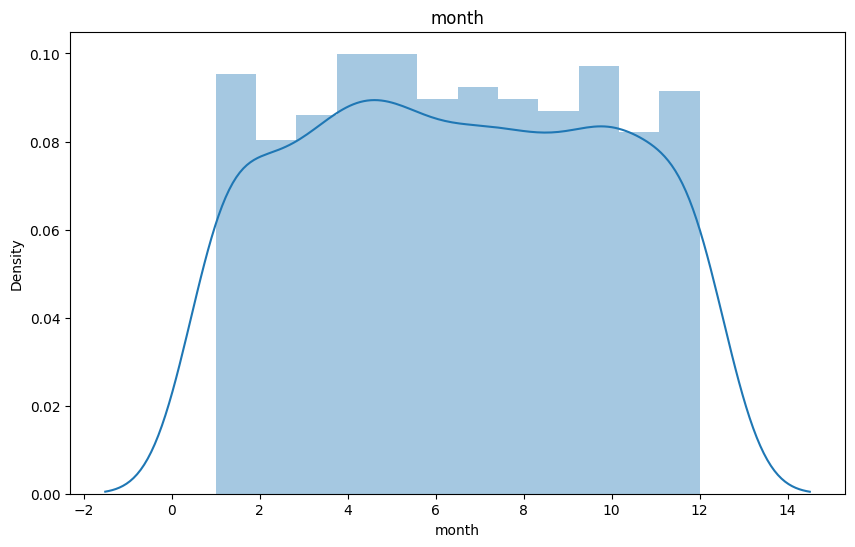

C:\Users\Noor Saeed\AppData\Local\Temp\ipykernel_12028\1271118368.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


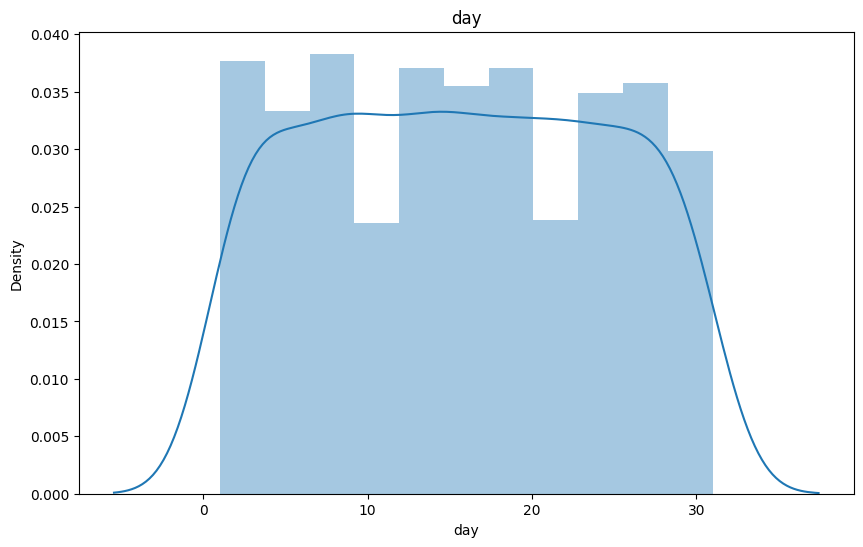

In [164]:
for col in X_train.columns:
    plt.figure(figsize=(10,6))
    sns.distplot(X_train[col])
    plt.title(col)
    plt.show()
    

# Training models


In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

In [168]:
models = {
    "lg": LogisticRegression(),
    "dtc": DecisionTreeClassifier(),
    "rfc": RandomForestClassifier(),
    "gbn": GaussianNB()
}

for name,mod in models.items():
    mod.fit(X_train,y_train)
    y_pred = mod.predict(X_test)
    
    print(f"{name} with accuracy {accuracy_score(y_test,y_pred)}")

C:\Users\Noor Saeed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


lg with accuracy 0.7781569965870307
dtc with accuracy 0.7781569965870307
rfc with accuracy 0.8464163822525598
gbn with accuracy 0.8430034129692833


# Selecting model

In [169]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

# Weather Predictive System

In [172]:
def weather_pred(precipitation,temp_max,temp_min,wind,year,month,day):
    features = np.array([[precipitation,temp_max,temp_min,wind,year,month,day]])
    prediction_out = gnb.predict(features).reshape(1,-1)
    
    return prediction_out[0]

In [174]:
precipitation = 1.5
temp_max = 12.2
temp_min = 9.4
wind = 3.8
year = 2013
month = 4
day = 11

result = weather_pred(precipitation,temp_max,temp_min,wind,year,month,day)
result

C:\Users\Noor Saeed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [ ]:
# 'rain':0,"sun":1,'fog':2,'drizzle':3,'snow':4
                    
if result == 0:
    print("its raining")
elif result == 1:
    print('its sunny')
elif result == 2:
    print('its foggy')
elif result == 3:
    print('its drizzle')
elif result == 4:
    print('its snowing')
    
else:
    print("there is some error")

In [ ]:
raing: 1.5     12.2    6.7   3.8   2013   4  11

sunny:   0.0   21.7 13.3 3.2 2013 6 7

In [170]:
import pickle
pickle.dump(gnb,open('model.pkl','wb'))